In [2]:
from numpy import *
from random import *
from pandas import *
from pylab import *
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [136]:
corona = read_csv('Corona_Korea.csv')
arr = corona.to_numpy()
day = zeros(n)
infect = zeros(n)

for t in range(n):
    tmp = arr[t,1]
    day[t] = int(tmp)
    tmp = arr[t,2]
    infect[t] = int(tmp.replace(',',''))

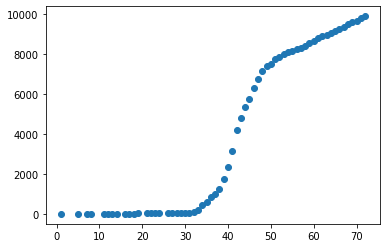

In [137]:
plot(day, infect, 'o')
show()

In [138]:
line_fitter = LinearRegression()
line_fitter.fit(day.reshape(-1, 1), infect)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

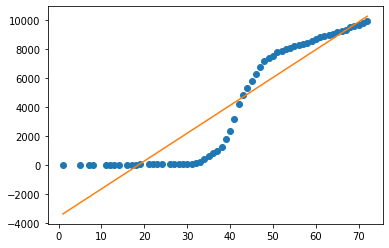

In [139]:
plt.plot(day, infect, 'o')
plt.plot(day,line_fitter.predict(day.reshape(-1,1)))
plt.show()

In [140]:
line_fitter.predict([[72]])

array([10248.45554781])

In [ ]:
# 선형회귀를 사용하여 4월 9일엔 확진자가 약 10248명이 될 것이라 예측

5.816141144066608 0.9978991596638656
26.682088198218654 5.824536582612338
32.13550455182224 10.853498989542459
33.44479427858847 14.478173441416109
33.831638771815655 17.145283918516512
33.95035022764187 19.22521117777682
33.98608808885582 20.87315362895324
33.99635499475806 22.28697542359312
33.99912012049432 23.436181786013545


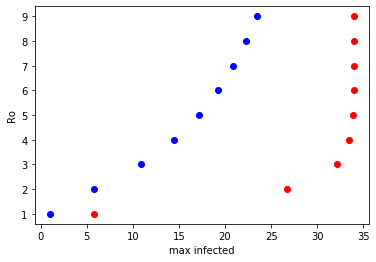

In [30]:
N = 34
dt = 1
S = zeros(100); I = zeros(100); R = zeros(100); C = zeros(100)
S[0] = 33; I[0] = 1; R[0] = N - S[0] - I[0]; C[0] = 1
day = zeros(100); day[0] = 0
gamma = 1/14
beta = Ro*gamma
m=zeros(100)
x=zeros(100)

for k in range(1,10):
    for d in range(1,100):
        Ro = k
        beta = Ro*gamma
        day[d] = d
        beta1 = beta*(1 + random() - 0.5)
        gamma1 = gamma*(1 + random() - 0.5)
        S[d] = S[d-1] - dt*beta*I[d-1]*S[d-1]/N
        I[d] = I[d-1] + dt*(beta*I[d-1]*S[d-1]/N - gamma*I[d-1])
        C[d] = C[d-1] + dt*(beta*S[d-1]*I[d-1]/N)
        R[d] = dt*gamma*I[d-1]
        m[d]=C[d]
        x[d]=I[d]
    M=max(m)
    X=max(x)
    print(M,X)
    plot(M,Ro,'ro',X,Ro,'bo')
    xlabel('max infected')
    ylabel('Ro')
show()

70.95645895861524 9.992857142857142
744.3334272947194 161.19030201069273
942.3259722705249 312.3225302792094
983.1281106964293 420.3858972668641
994.9023876189485 500.8395400132806
998.4974459554767 562.3509479447562
999.5787142898773 611.4473793883639
999.8894853799422 652.3842588329804
999.9732779436179 685.7951096083392


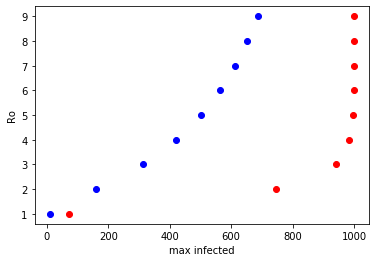

In [32]:
N = 1000
dt = 1
S = zeros(100); I = zeros(100); R = zeros(100); C = zeros(100)
S[0] = 990; I[0] = 10; R[0] = N - S[0] - I[0]; C[0] = 10
day = zeros(100); day[0] = 0
gamma = 1/14
beta = Ro*gamma
m=zeros(100)
x=zeros(100)

for k in range(1,10):
    for d in range(1,100):
        Ro = k
        beta = Ro*gamma
        day[d] = d
        beta1 = beta*(1 + random() - 0.5)
        gamma1 = gamma*(1 + random() - 0.5)
        S[d] = S[d-1] - dt*beta*I[d-1]*S[d-1]/N
        I[d] = I[d-1] + dt*(beta*I[d-1]*S[d-1]/N - gamma*I[d-1])
        C[d] = C[d-1] + dt*(beta*S[d-1]*I[d-1]/N)
        R[d] = dt*gamma*I[d-1]
        m[d]=C[d]
        x[d]=I[d]
    M=max(m)
    X=max(x)
    print(M,X)
    plot(M,Ro,'ro',X,Ro,'bo')
    xlabel('max infected')
    ylabel('Ro')
show()

In [ ]:
# 파란 점은 각 Ro값에 대해 최대 감염자수, 빨간 점은 총 감염자수이다. 둘 다 Ro값이 커질수록 높아지는 것을 볼 수 있다. 특히
# 최대 감염자수는 특수한 규칙을 가지고 증가하는 것으로 보이는데, 2차적으로 증가한다고 생각된다.

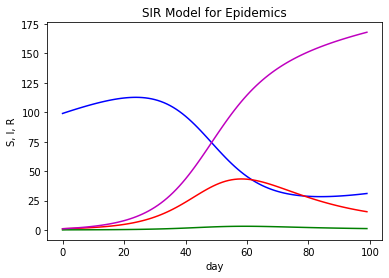

168.03437036983632


In [141]:
N = 100
dt = 1 
S = zeros(100); I = zeros(100); R = zeros(100); C = zeros(100)
S[0] = 99; I[0] = 1; R[0] = N - S[0] - I[0]; C[0] = 1
day = zeros(100); day[0] = 0
c = 1  
gamma = 1/14 
Ro = 2  
beta = Ro*gamma

for d in range(1,100):
    day[d] = d
    S[d] = S[d-1] - dt*beta*I[d-1]*S[d-1]/N + dt*c
    I[d] = I[d-1] + dt*(beta*I[d-1]*S[d-1]/N - gamma*I[d-1])
    C[d] = C[d-1] + dt*(beta*S[d-1]*I[d-1]/N)
    R[d] = dt*gamma*I[d-1]
plot(day,S,'b-',day,I,'-r',day,R,'-g',day,C,'-m')
xlabel('day')
ylabel('S, I, R')
title('SIR Model for Epidemics')
show()
print(C[99])

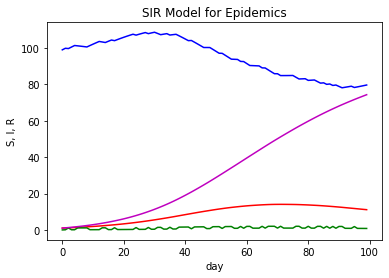

74.33420174391227


In [20]:
dt = 1 
S = zeros(100); I = zeros(100); R = zeros(100); C = zeros(100); N = zeros(100)
N[0] = 100; S[0] = 99; I[0] = 1; R[0] = N[0] - S[0] - I[0]; C[0] = 1
day = zeros(100); day[0] = 0
c = 1  
gamma = 1/14 
Ro = 2   
beta = Ro*gamma

for d in range(1,100):
    day[d] = d
    N[d] = N[d-1] + dt*c
    if random() > 0.5:
        S[d] = S[d-1] - dt*beta*I[d-1]*S[d-1]/N[d-1] + dt*c
        I[d] = I[d-1] + dt*(beta*I[d-1]*S[d-1]/N[d-1] - gamma*I[d-1])
        C[d] = C[d-1] + dt*(beta*S[d-1]*I[d-1]/N[d-1])
        R[d] = dt*gamma*I[d-1]
    else:
        S[d] = S[d-1] - dt*beta*I[d-1]*S[d-1]/N[d-1]
        I[d] = I[d-1] + dt*(beta*I[d-1]*S[d-1]/N[d-1] - gamma*I[d-1])
        C[d] = C[d-1] + dt*(beta*S[d-1]*I[d-1]/N[d-1])
        R[d] = dt*gamma*I[d-1] + dt*c
plot(day,S,'b-',day,I,'-r',day,R,'-g',day,C,'-m')
xlabel('day')
ylabel('S, I, R')
title('SIR Model for Epidemics')
show()
print(C[99])

In [ ]:
# 총 인구수 100명, 처음 감염자수 1명, 매일 1명씩 입국한다고 가정하였다. 이 때, 공항에서 입국자가 정상인인지 감염자인지
# 바로 판단할 수 있도록 검사를 실시하여 감염자일 경우, 바로 격리하여 치료될 때까지 아무도 만나지 못한다고 가정한다.
# 입국자의 감염 여부는 50% 확률로 정상, 50%확률로 감염이라고 가정한다. 그러면 정상일 경우 바로 suseptible 인구에 들어가고
# 감염일 경우 치료될 때까지 격리되어 있기 때문에 바로 recovered 인구에 넣는다. 이러면 누적 확진자수가 점점 증가하긴 하지만
# 이전에 사용한 모델보다 누적 확진자 수가 훨씬 적은 것을 볼 수 있다.
# 따라서 공항에 검염소를 설치하는 방법이 큰 도움이 될 것이다.